# COGS 118A: Supervised Machine Learning Algorithms
## Homework Assignment 5

## 1 (8 points) Conceptual Questions

### (1.1)

B. Linear regression deals with the prediction of continuous values; logistic
regression deals with the prediction of class labels.

### (1.2)

C. When the learning rate is very large, it is possible that some iterations of
gradient descent may not decrease the value of loss function.

D. With different initial weights, it is possible for the gradient descent algorithm to obtain to different local minimum.

## 2 (12 points) Error Metrics

### (2.1)

Recall = $\frac{2}{3}$

### (2.2)

Precision = $\frac{2}{4} = \frac{1}{2}$

### (2.3)

F-value = $\frac{2(\frac{1}{2})(\frac{2}{3})}{\frac{1}{2} + \frac{2}{3}} = \frac{4}{7}$

## 3 (10 points) Logistic Regression Inference

### (3.1)

Text(0, -20, '$(0, 10)$')

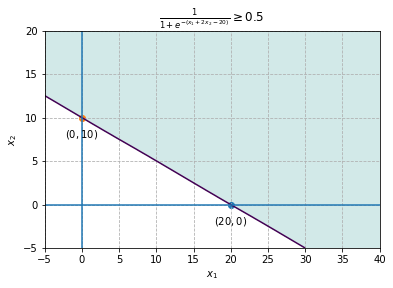

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

w1 = 1
w2 = 2
b = -20

X1_range = np.linspace(-5, 40, 30)
X2_range = np.linspace(-5, 20, 30)
X1, X2 = np.meshgrid(X1_range, X2_range)
F = 1 / (1 + np.exp(-(w1*X1 + w2*X2 + b)))

plt.title("$\\frac{1}{1 + e^{-(x_1+2x_2-20)}} \\geq 0.5$")
plt.axhline(0)
plt.axvline(0)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(linestyle='--')
plt.contour(X1, X2, F, [0.5])
plt.contourf(X1, X2, F, [0.5, 1], alpha=0.2)

plt.scatter(20, 0)
plt.scatter(0, 10)
plt.annotate("$(20, 0)$", (20, 0), textcoords="offset points", xytext=(0, -20), ha='center')
plt.annotate("$(0, 10)$", (0, 10), textcoords="offset points", xytext=(0, -20), ha='center')

### (3.2)

Text(0, -20, '$x_2 = (10, 3)$')

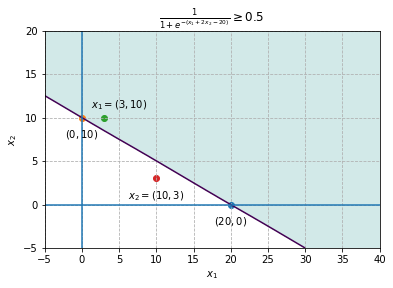

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

w1 = 1
w2 = 2
b = -20

X1_range = np.linspace(-5, 40, 30)
X2_range = np.linspace(-5, 20, 30)
X1, X2 = np.meshgrid(X1_range, X2_range)
F = 1 / (1 + np.exp(-(w1*X1 + w2*X2 + b)))

plt.title("$\\frac{1}{1 + e^{-(x_1+2x_2-20)}} \\geq 0.5$")
plt.axhline(0)
plt.axvline(0)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(linestyle='--')
plt.contour(X1, X2, F, [0.5])
plt.contourf(X1, X2, F, [0.5, 1], alpha=0.2)

plt.scatter(20, 0)
plt.scatter(0, 10)
plt.annotate("$(20, 0)$", (20, 0), textcoords="offset points", xytext=(0, -20), ha='center')
plt.annotate("$(0, 10)$", (0, 10), textcoords="offset points", xytext=(0, -20), ha='center')

plt.scatter(3, 10)
plt.scatter(10, 3)
plt.annotate("$x_1 = (3, 10)$", (3, 10), textcoords="offset points", xytext=(15, 10), ha='center')
plt.annotate("$x_2 = (10, 3)$", (10, 3), textcoords="offset points", xytext=(0, -20), ha='center')

$f(x_1) = 1\\
f(x_2) = -1$

## 4 (40 points) Logistic Regression

### (4.1) Your code.

In [3]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Load the modified Iris dataset

In [4]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1).astype(np.float) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 
Y[Y==0] = -1

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  -1 ]

(150, 4)
(150, 1)
[ 5.8  4.   1.2  0.2 -1. ]


In [5]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]


X_train = X_shuffled[:100][:,[3,1]] # Shape: (100,2)
X_train = np.delete(X_train, 42, axis=0) # Remove a point for separability.
Y_train = Y_shuffled[:100]          # Shape: (100,)
Y_train = np.delete(Y_train, 42, axis=0) # Remove a point for separability.
X_test = X_shuffled[100:][:,[3,1]]  # Shape: (50,2)
Y_test = Y_shuffled[100:]           # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(99, 2)
(99,)
(50, 2)
(50,)


### Visualization

In [6]:
def vis(X, Y, W=None, b=None):
    indices_neg1 = (Y == -1).nonzero()[0]
    indices_pos1 = (Y == 1).nonzero()[0]
    plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1], 
                c='blue', label='class -1')
    plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1], 
                c='red', label='class 1')
    plt.legend()
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    
    if W is not None:
        # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1
        w0 = W[0]
        w1 = W[1]
        temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0
        x0_min = max(temp.min(), X[:,0].min())
        x0_max = min(temp.max(), X[:,1].max())
        x0 = np.linspace(x0_min,x0_max,100)
        x1 = -w0*x0/w1-b/w1
        plt.plot(x0,x1,color='black')

    plt.show()

### Logistic Regression Using Gradient Descent

In this problem, we would like to use the gradient descent to calculate the parameters $\mathbf{w},b$ for a logistic regression model.
If we have the loss function $\mathcal{L}(\mathbf{w},b)$, then a typical gradient descent algorithm contains the following steps:

**Step 1**. Initialize the parameters $\mathbf{w}$, $b$.

for i = 1 to #iterations:

- **Step 2**. Compute the partial derivatives $\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial \mathbf{w}}$, $\frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial b}$.

- **Step 3**. Update the parameters 
$$\mathbf{w} \leftarrow \mathbf{w} - \eta \frac{\partial \mathcal{L}(\mathbf{w}, b)}{\partial \mathbf{w}}, \quad\quad b \leftarrow b - \eta \frac{\partial \mathcal{L}(\mathbf{w},b)}{\partial b}$$
where $\eta$ is the learning rate.

Note that in the code, we use `W` and `b` to represent the weight vector $\mathbf{w}$ and bias scalar $b$.

In [7]:
# Sigmoid function: sigmoid(z) = 1/(1 + e^(-z))
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [8]:
# Judge function: 1(a != b).
def judge(a, b):
    return int(a != b)
    
# Logistic regression classifier.
def f_logistic(x, W, b):
    # x should be a 2-dimensional vector, 
    # W should be a 2-dimensional vector,
    # b should be a scalar.
    # you should return a scalar which is -1 or 1.
    if (sigmoid(W.T @ x + b) >= 0.5):
        return 1
    else:
        return -1
    
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, W, b):
    error = 0
    
    for (xi, yi) in zip(X, Y):
        error = error + judge(f_logistic(xi, W, b), yi)
    
    error = error * (1 / X.shape[0])
    return error

In [9]:
# Gradient of L(W, b) with respect to W and b.
def grad_L_W_b(X, Y, W, b):
    grad_W = 0
    grad_b = 0
    
    for (xi, yi) in zip(X, Y):
        pi = sigmoid(yi * (W.T @ xi + b))
        grad_W = grad_W - (1 - pi) * yi * xi
        grad_b = grad_b - (1 - pi) * yi
    
    return grad_W, grad_b

In [10]:
# Loss L(W, b).
def L_W_b(X, Y, W, b):
    loss = 0

    for (xi, yi) in zip(X, Y):
        pi = sigmoid(yi * (W.T @ xi + b))
        loss = loss - np.log(pi)
    
    return loss

In [11]:
# Some settings.
learning_rate = 0.001
iterations    = 10000
losses = []

# Gradient descent algorithm for logistic regression.
# Step 1. Initialize the parameters W, b.
W = np.zeros(2) 
b = 0

for i in range(iterations):
    # Step 2. Compute the partial derivatives.
    grad_W, grad_b = grad_L_W_b(X_train, Y_train, W, b)
    # Step 3. Update the parameters.
    W = W - learning_rate * grad_W
    b = b - learning_rate * grad_b

    # Track the training losses.
    losses.append(L_W_b(X_train, Y_train, W, b))

### (4.2)  Equation of decision boundary corresponding to the optimal w∗ and b.

In [12]:
print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))

Decision boundary: 11.666x0+-4.401x1+-6.462=0


### (4.3) Plot of training set along with decision boundary.

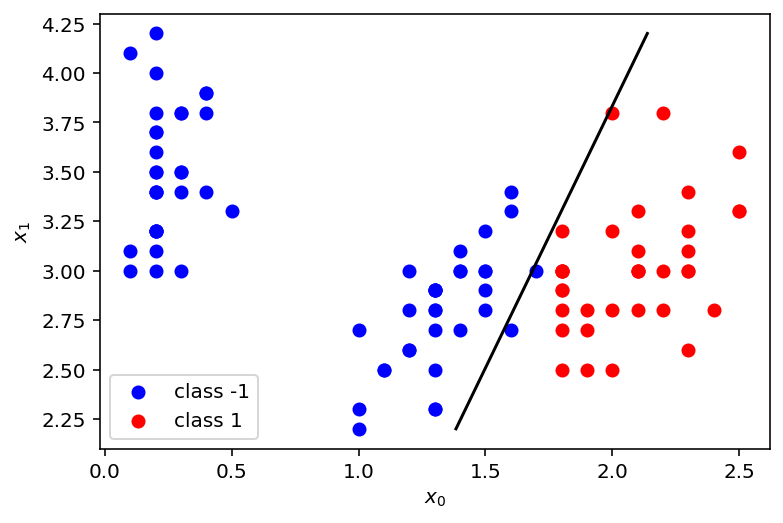

In [13]:
vis(X_train, Y_train, W, b)

### (4.4)  Plot of test set along with decision boundary.

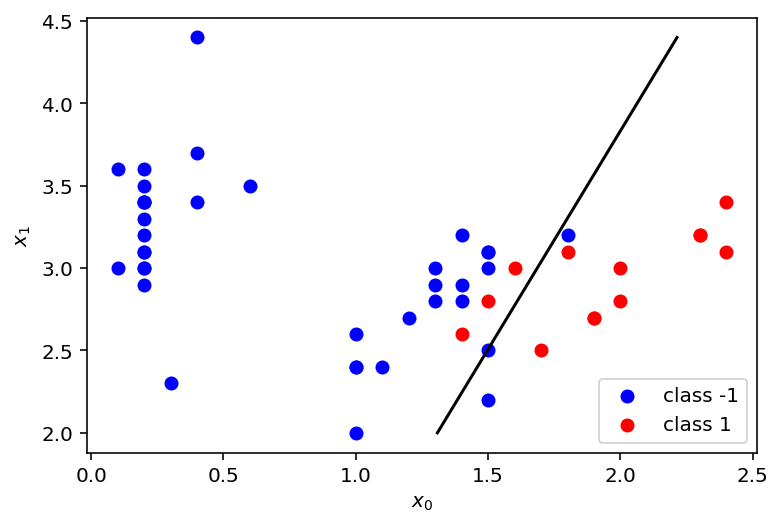

In [14]:
vis(X_test, Y_test, W, b)

### (4.5) Training error and test error.

In [15]:
print('Training error: {}'.format(calc_error(X_train, Y_train, W, b)))
print('Test error: {}'.format(calc_error(X_test, Y_test, W, b)))

Training error: 0.020202020202020204
Test error: 0.12


### (4.6) Training loss curve.

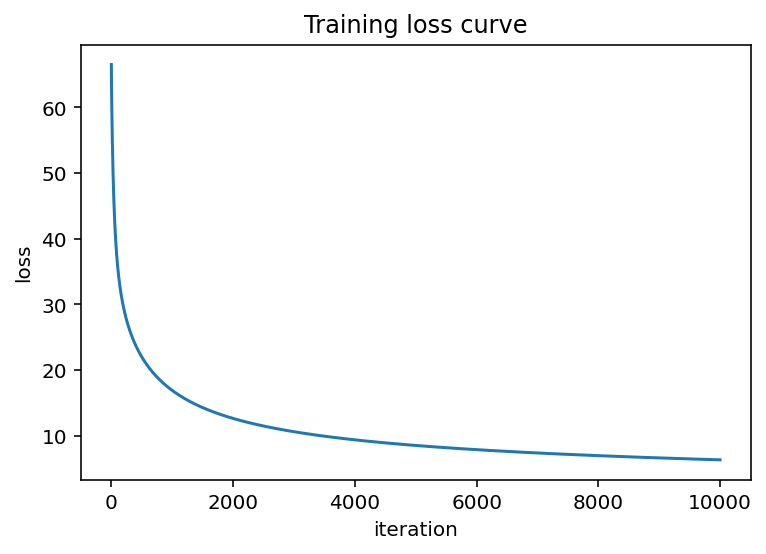

In [16]:
# Plot training loss curve.
plt.title('Training loss curve')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(losses)
plt.show()

## 5 (30 points) Perceptron

### (5.1) Your code.

In [17]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Load the modified Iris dataset

In [18]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1).astype(np.float) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 
Y[Y==0] = -1

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  -1 ]

(150, 4)
(150, 1)
[ 5.8  4.   1.2  0.2 -1. ]


In [19]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]


X_train = X_shuffled[:100][:,[3,1]] # Shape: (100,2)
X_train = np.delete(X_train, 42, axis=0) # Remove a point for separability.
Y_train = Y_shuffled[:100]          # Shape: (100,)
Y_train = np.delete(Y_train, 42, axis=0) # Remove a point for separability.
X_test = X_shuffled[100:][:,[3,1]]  # Shape: (50,2)
Y_test = Y_shuffled[100:]           # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(99, 2)
(99,)
(50, 2)
(50,)


### Visualization

In [20]:
def vis(X, Y, W=None, b=None):
    indices_neg1 = (Y == -1).nonzero()[0]
    indices_pos1 = (Y == 1).nonzero()[0]
    plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1], 
                c='blue', label='class -1')
    plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1], 
                c='red', label='class 1')
    plt.legend()
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    
    if W is not None:
        # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1
        w0 = W[0]
        w1 = W[1]
        temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0
        x0_min = max(temp.min(), X[:,0].min())
        x0_max = min(temp.max(), X[:,1].max())
        x0 = np.linspace(x0_min,x0_max,100)
        x1 = -w0*x0/w1-b/w1
        plt.plot(x0,x1,color='black')

    plt.show()

### Perceptron Algorithm

In this problem, we would like to train a perceptron model for the classification task on a modified Iris dataset. The training procedure of the perceptron model is shown in the algorithm below:

<img src="perceptron-algorithm.png" width=600 align="left">

Note that in the code, we use `X_train` and `Y_train` to represent the feature vector $X$ and labels $Y$ in training set $S_\text{training}$. Besides, we use `W` and `b` to represent the weight vector $\mathbf{w}$ and bias scalar $b$.

Please fill the blanks of the skeleton code below to complete the perceptron training procedure.

**Hint**: For the implementation of some functions, you may refer to HW2 Q5.

In [21]:
# Judge function: 1(a != b).
def judge(a, b):
    return int(a != b)
    
# Perceptron classifier.
def f_perceptron(x, W, b):
    # x should be a 2-dimensional vector, 
    # W should be a 2-dimensional vector,
    # b should be a scalar.
    # you should return a scalar which is -1 or 1.
    if (W.T @ x + b >= 0):
        return 1
    else:
        return -1
    
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, W, b):
    error = 0
    
    for (xi, yi) in zip(X, Y):
        error += judge(f_logistic(xi, W, b), yi)
    
    error /= X.shape[0]
    return error

In [22]:
# Some settings.
errors = []           # Error history.
lam    = 1            # Lambda which controls the step size.

# Initialization.
W      = np.zeros(2)  # Weight.
b      = 0.0          # Bias.

# Perceptron learning algorithm.
while calc_error(X_train, Y_train, W, b) > 0:
    for xi, yi in zip(X_train, Y_train):   # Iterate over all data points.
        # Compute the model prediction.
        prediction = f_perceptron(xi, W, b)
        
        # Compare prediction and label.
        if (yi == prediction):    
            # - If correct, continue.
            continue
        else:
            # - If not, update weight and bias.
            W = W + lam * (yi - prediction) * xi
            b = b + lam * (yi - prediction)
            
    # Track training errors. 
    errors.append(calc_error(X_train, Y_train, W, b))

### (5.2)  Equation of decision boundary corresponding to the optimal w∗ and b.

In [23]:
print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))

Decision boundary: 70.200x0+-24.800x1+-46.000=0


### (5.3) Plot of training set along with decision boundary.

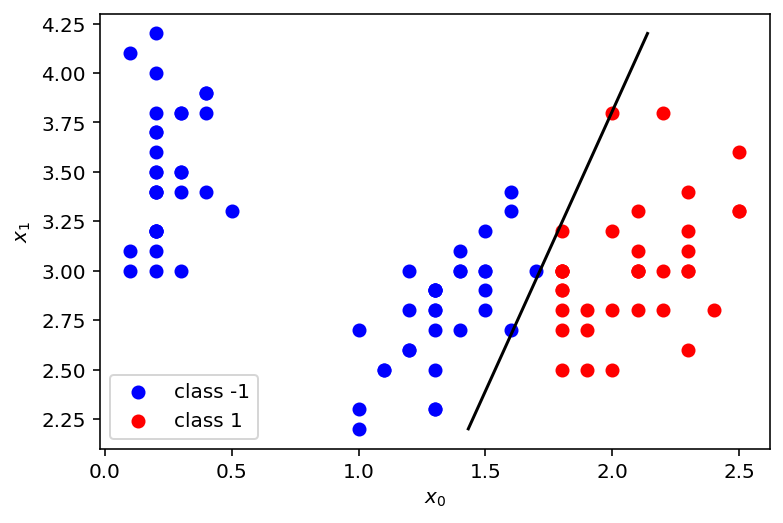

In [24]:
vis(X_train, Y_train, W, b)

### (5.4)  Plot of test set along with decision boundary.

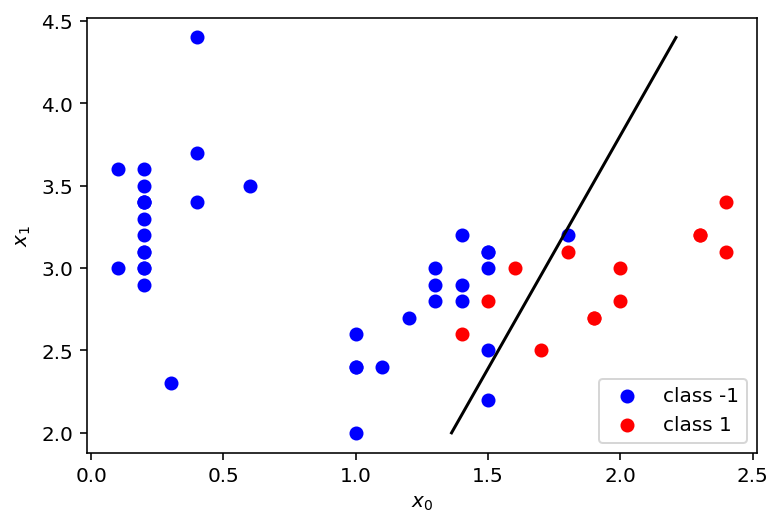

In [25]:
vis(X_test, Y_test, W, b)

### (5.5) Training error and test error.

In [26]:
print('Training error: {}'.format(calc_error(X_train, Y_train, W, b)))
print('Test error: {}'.format(calc_error(X_test, Y_test, W, b)))

Training error: 0.0
Test error: 0.1


### (5.6) Training error curve.

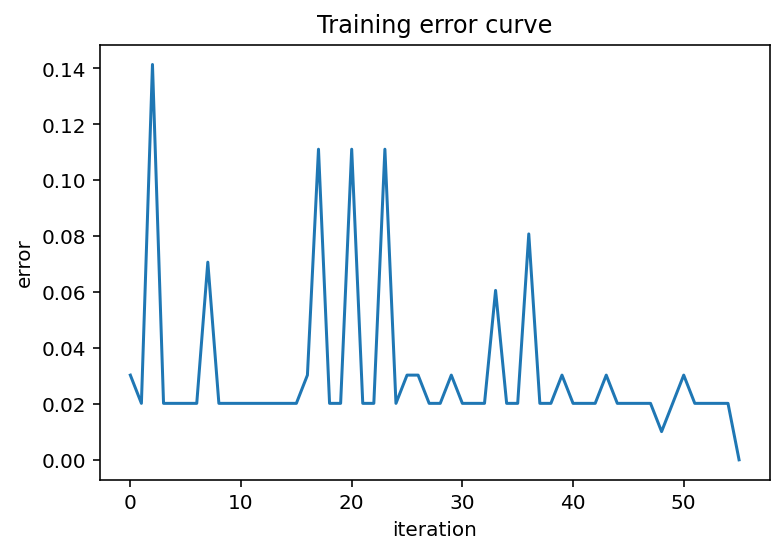

In [27]:
# Plot training error curve.
plt.title('Training error curve')
plt.plot(errors)
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()